In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [54]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [55]:
data.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [56]:
data=data.join(pd.get_dummies(data.Gender).astype(int)).drop(['Gender'],axis=1)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Female                  200 non-null    int64
 5   Male                    200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [58]:
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


<Axes: >

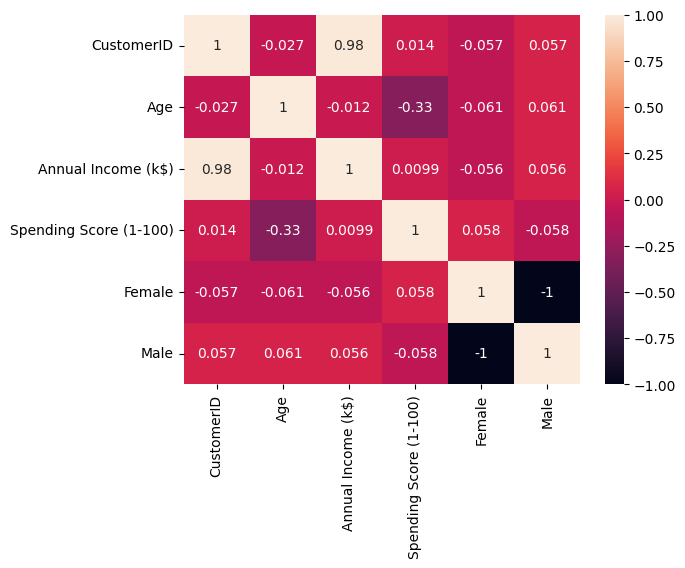

In [59]:
sns.heatmap(data.corr(),annot=True)

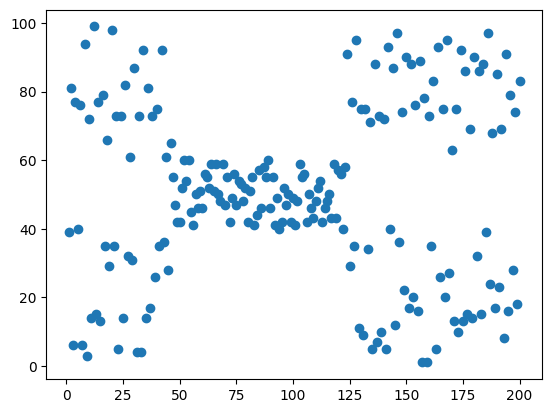

In [60]:
plt.scatter(data['CustomerID'],data['Spending Score (1-100)'])

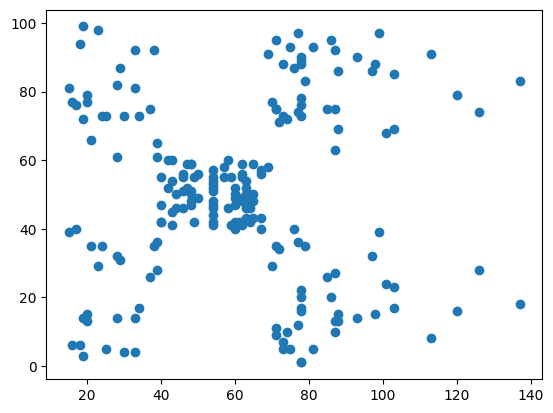

In [61]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

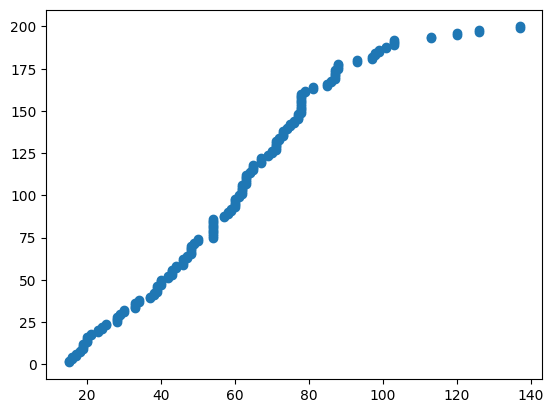

In [62]:
plt.scatter(data['Annual Income (k$)'],data['CustomerID'])

In [63]:
data1 = data[['Spending Score (1-100)','Annual Income (k$)']]

In [64]:
# The customers annual income and spending score are positively related so we can apply KMeans clusterinng on both of these data

In [94]:
# finding the silhoueette score to determine the number of clusters the greater the better
from sklearn.metrics import silhouette_score
score = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data1)
  score.append(silhouette_score(data1,kmeans.labels_))


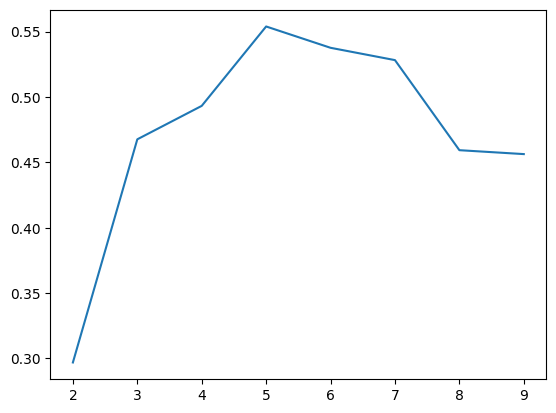

In [95]:
# plotting the graph of score vs the k value
plt.plot(range(2,10),score)

In [101]:
# the value of k should be equal to 5 as it gives the highest value
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data1)
y=kmeans.predict(data1)
data1['label'] = y

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

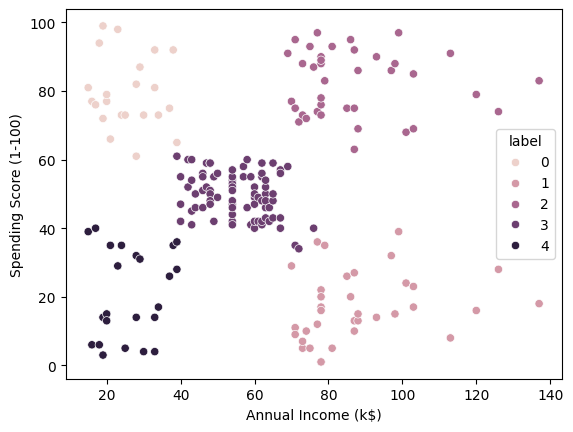

In [102]:
# representing clusters using scatterplot
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='label',data=data1)

In [103]:
# so the customers are now segemeted into 5 groups based on spending score and annual income